# Supervised Machine Learning 

**01. Importing libraries**

**02. Importin the data**

**03. Task 6.3: data exploration**

**04. Task 6.4: regression**



## 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Making sure that the created graphics are displayed without needing to call them 
%matplotlib inline

## 02. Importing the data

In [3]:
#creating a path 
path = path = r'C:\Users\amore\Documents\Data Analyst course\Data Immersion\Achievement 6 Advanced Analytics\Airbnb Europe Analysis'

In [4]:
# importing the data
df_bnb=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','airbnb_europe_clean2.pkl'))

## 03. Task 6.3 Data exploration

**My working hypothesis is that price will be influenced by geographic location; cities in then north of Europe will be more expensive thant southern ones.**

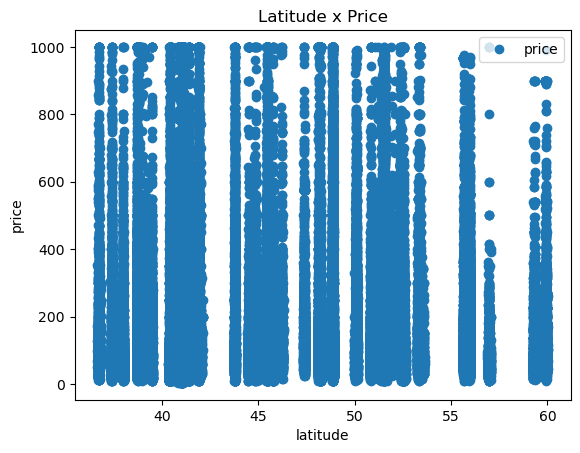

In [32]:
# the cleaning of data was already done in task 6.1, so the data is ready to be explored via a scatterplot

df_bnb.plot(x = 'latitude', y='price',style='o') 
plt.title('Latitude x Price')  
plt.xlabel('latitude')  
plt.ylabel('price')  
plt.show()

In [34]:
# Reshaping the variables into Numpy Arrays

X = df_bnb['latitude'].values.reshape(-1,1)
y = df_bnb['price'].values.reshape(-1,1)

In [35]:
# Splitting the data into a training set and a test set
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

## Task 6.4 Regression

In [36]:
#creating a regression 

regression = LinearRegression()

In [37]:
#Fiting the regression on the training set

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
y_predicted = regression.predict(X_test)

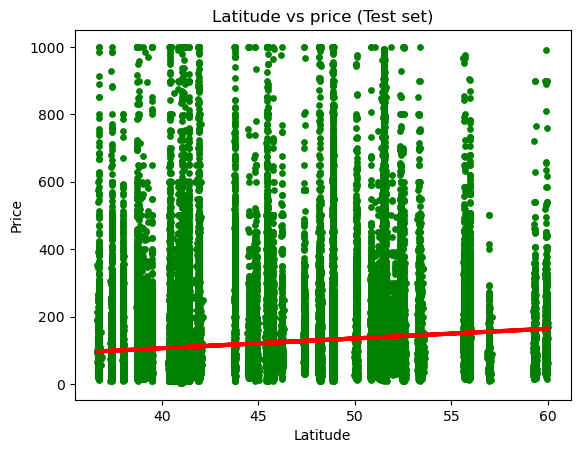

In [39]:
#creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Latitude vs price (Test set)')
plot_test.xlabel('Latitude')
plot_test.ylabel('Price')
plot_test.show()

In [40]:
#creating objects that contain the model summary statistics 
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

**The regression line deviates a lot from the datapoints, this was expected after the analysis done in Task 6.2, which showed very low correlation coefficients between the quantitative variables of my dataset. The line has a positive slope, which suggests that bigger latitude number (i.e. further to the north) have higher prices. As we'll se, however, the  summary statistics suggests an extremely weak to inexistant relation.** 

In [41]:
# Printing the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.88885859]]
Mean squared error:  12950.97175565481
R2 score:  0.020114954266227114


**As pointed out before, the summary statistics indicate that the model performs very poorly: the mean squared error is extremely high and the R2 score is very close to 0. This is caused, in my opinion, because there is a lot more factors that affect an airbnb price appart from its geographical location**

In [42]:
# Comparing the actual and predicted values of y (price)

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,56,139.185361
1,110,135.202145
2,160,131.668638
3,55,131.619556
4,63,137.394962
5,360,144.332065
6,175,141.041190
7,35,107.300856
8,35,104.486703
9,40,139.614443


**I think it's safe to say that the model performed very poorly, and therefore it should be discared. I think that this is, first and foremost, because there is a lot more factors that influence price and therefore any analyisis that rely on a single variable will, most likely be flawed. Moreover, I think that the Airbnb price is guided by qualitative variables mostly, such as the neighbourhoods, the quality of the accomodation, etc. It is true also, that some other quantitative variables, which are not included in the data I'm using might be much better to explain the variation in price, for example: the size of the accomodation, the distance to the center or the distance to public transportation** 